# Customer Lifetime Value Analysis

### Customer lifetime value analysis is used to estimate the total value of customers to the business over the lifetime of their relationship. It helps businesses make data-driven decisions on how to allocate their resources and improve their customer relationships.

Customer lifetime value (CLV) can help you to answers the most important questions about sales to every company:

How to Identify the most profitable customers?

How can a company offer the best product and make the most money?

How to segment profitable customers?

How much budget need to spend to acquire customers?

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Data

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011

a cancelled transactions starts with a "C" in front of it.



In [2]:
data = pd.read_csv('/content/data.csv' ,encoding="ISO-8859-1")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(162913, 8)

The data has 541909 Rows and 8 Columns.

#Data processing

### Missing data

In [5]:
data.isna().sum()

InvoiceNo          0
StockCode          0
Description      630
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     49493
Country            1
dtype: int64

`CustomerID` 135080 of missing rows (24.93% missing values)

The `CustomerID` column contains nearly a quarter of missing data. This column is essential for clustering customers,Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.
By removing rows with missing values in the CustomerID and Description columns, we aim to construct a cleaner and more reliable dataset

In [6]:
data = data[data['CustomerID'].isna()==False]

In [7]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

###Duplicated Rows

In [8]:
data.duplicated().sum()

1437

In [9]:
data.drop_duplicates(inplace= True)

### Converting dtypes

In [10]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

 let's convert 'InvoiceDate' to a datetime data type and 'CustomerID' to an integer data type.

In [11]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [12]:
data['CustomerID'] = data['CustomerID'].astype(int , errors = 'ignore')

### Treating With Cancelled Transactions

we will drop it now and and analysis it later

In [13]:
data = data[data['InvoiceNo'].apply(lambda x : x[0]) != 'C']

# EDA

## Customer Lifetime Value


There are lots of approaches available for calculating CLTV. Everyone has his own view on it that suitable for his bussines

**CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.**

In [ ]:
#Calulate total purchase
data['total purchase'] = data['UnitPrice'] * data['Quantity']

In [15]:
data_group = data.groupby('CustomerID' , as_index=False).agg({
    'total purchase':'sum' , 'InvoiceNo':'count' ,'Country':'min' ,'InvoiceDate':lambda date:(max(date) - min(date)).days}).rename(
      columns = {'InvoiceNo' : 'num_transactions' , 'InvoiceDate':'days'})

**1. Calculate Average Order Value**

In [16]:
data_group['avg_order_value'] = data_group['total purchase']/data_group['num_transactions']

In [17]:
data_group.head()

,CustomerID,total purchase,num_transactions,Country,days,avg_order_value
0,12346,77183.60,1,United Kingdom,0,77183.600000
1,12347,1823.43,84,Iceland,120,21.707500
2,12348,1487.24,28,Finland,109,53.115714
3,12350,334.40,17,Norway,0,19.670588
4,12352,1561.81,38,Norway,34,41.100263


**2. Calculate Purchase Frequency**

In [18]:
purchase_frequency=sum(data_group['num_transactions'])/data_group.shape[0]

**3. Calculate Repeat Rate and Churn Rate**

In [19]:
repeat_rate = len(data_group[data_group['num_transactions'] >= 2]) / len(data_group)
round(repeat_rate*100.0 , 2)

97.03

the percentage of repeat_rate is :**` 98.34 % `**

**Churn Rate**

In [20]:
#Churn Rate
churn_rate=1-repeat_rate
round(churn_rate*100.0 , 2)

2.97

the percentage of Churn rate is :**` 1.66 % `**

**4. Calculate Profit Margin**

 It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 10% profit on the total sale.

In [21]:
data_group['profit_margin']=data_group['total purchase']*0.1

**5. Calcualte Customer Lifetime Value**


In [22]:
churn_rate

0.02972399150743099

In [23]:
data_group['CLV']=(data_group['avg_order_value']*purchase_frequency)
data_group['CLV'] = data_group['CLV']/churn_rate
data_group['CLV'] = data_group['CLV'].apply(lambda x: '{:.2f}'.format(x))


In [24]:
data_group.head()

,CustomerID,total purchase,num_transactions,Country,days,avg_order_value,profit_margin,CLV
0,12346,77183.60,1,United Kingdom,0,77183.600000,7718.360,120344669.12
1,12347,1823.43,84,Iceland,120,21.707500,182.343,33846.33
2,12348,1487.24,28,Finland,109,53.115714,148.724,82818.02
3,12350,334.40,17,Norway,0,19.670588,33.440,30670.38
4,12352,1561.81,38,Norway,34,41.100263,156.181,64083.53


#Customer Segmentation

## based on their total purchase value


In [25]:
data_group_v1 = data_group
data_group_v1['Segmant Purchase'] = pd.cut(data_group['total purchase'] , bins = [0,1500,3500,float('inf')] , labels = ['Low purchase' , 'Medium purchase' ,'High purchase'])

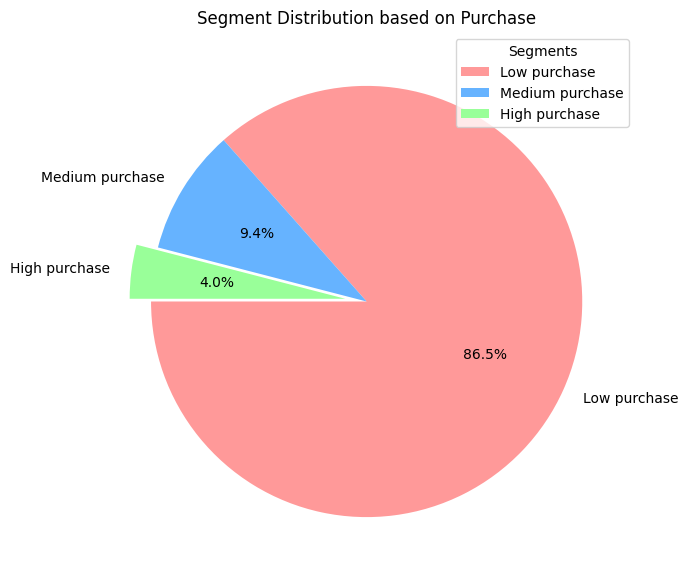

In [26]:

v1 = data_group_v1['Segmant Purchase'].value_counts()

colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = [0,0,0.1]
plt.figure(figsize=(8, 7))
plt.pie(v1, labels=v1.index, colors=colors, autopct='%1.1f%%', startangle=180,explode = explode)
plt.title('Segment Distribution based on Purchase')
plt.legend(v1.index, title='Segments', loc='upper right')
plt.show()


## Cusotmers With High Transactions

In [27]:
# top_10_Custopers
x = data_group[['CustomerID','num_transactions']].sort_values(by = 'num_transactions' ,ascending = [False]).head(10)

Text(0.5, 1.0, 'top_10_Customers')

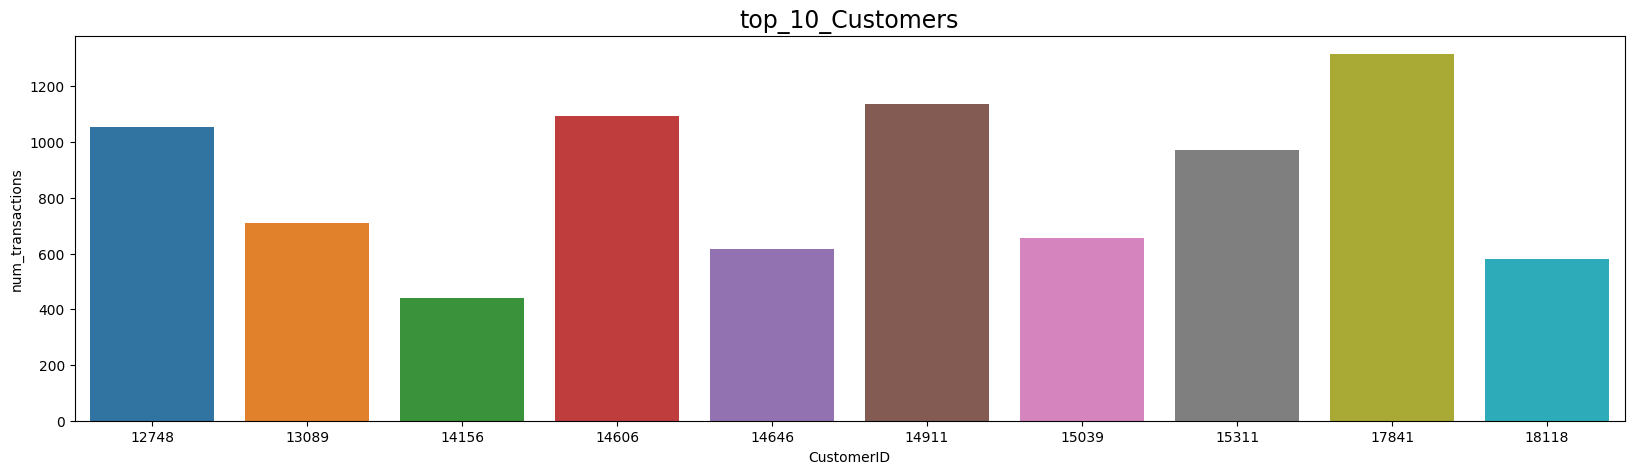

In [28]:
plt.figure(figsize=(20,5))
sns.barplot(data =x , x = 'CustomerID'	,y ='num_transactions')
plt.title("top_10_Customers" , fontsize = 17)


# Geographic Analysis:

## TOP 10 Countries In Revenue of Purchase

In [29]:
data_group_v2 = data_group.groupby('Country' , as_index = False).agg({'total purchase' : 'sum' , 'num_transactions':'sum'})

In [30]:
data_group_v2 = data_group_v2.sort_values(by = 'total purchase' , ascending=False).head(10)

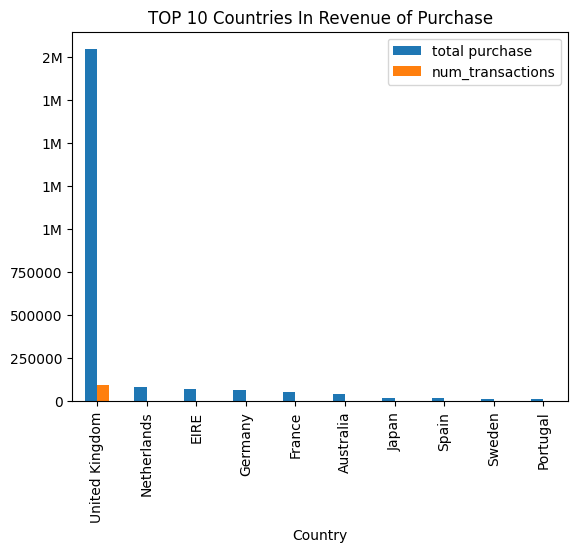

In [31]:
from matplotlib.ticker import FuncFormatter
data_group_v2.plot(kind = 'bar' , x = 'Country')
def format_y_ticks(value, _):
    if value >= 1e6:
        return f'{int(value/1e6)}M'
    else:
        return int(value)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
plt.title('TOP 10 Countries In Revenue of Purchase')
plt.show()

##In which Country do we have more customers?

In [103]:
country = data_group['Country'].value_counts().reset_index(drop = False).head(10)
country

,index,Country
0,United Kingdom,2139
1,Germany,50
2,France,42
3,Spain,16
4,Belgium,15
5,Portugal,10
6,Switzerland,9
7,Australia,8
8,Italy,8
9,Channel Islands,7


## Countries That has high cancellation of orders

In [32]:
data_Cancel = pd.read_csv('/content/data.csv' , encoding='ISO-8859-1')
data_Cancel = data_Cancel[data_Cancel['InvoiceNo'].apply(lambda x : x[0]) == 'C']
data_Cancel['InvoiceDate'] = pd.to_datetime(data_Cancel['InvoiceDate'])

In [33]:
data_Cancel_vals = data_Cancel['Country'].value_counts().nlargest(5)

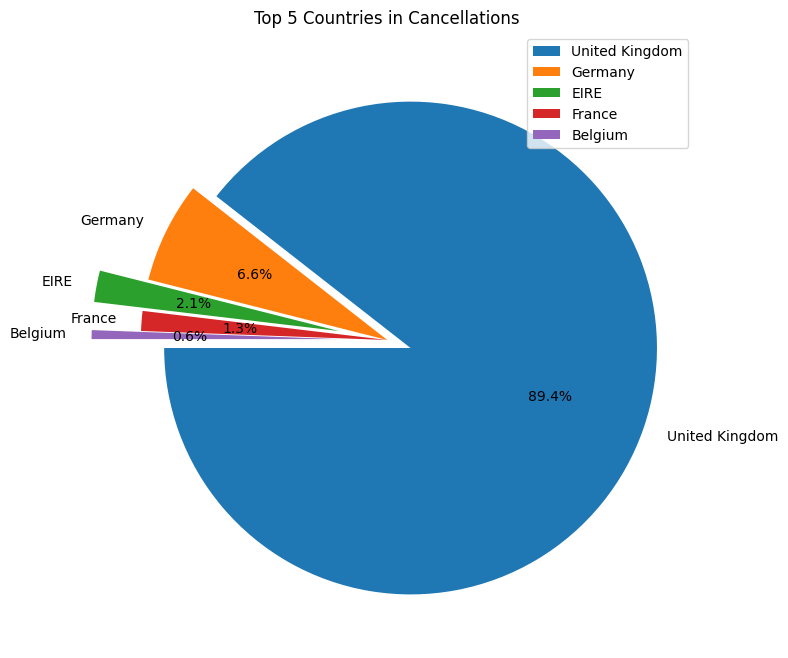

In [34]:

explode =[0.1,0,0.2,0,0.2]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']

plt.figure(figsize=(8, 8))
plt.pie(data_Cancel_vals, labels=data_Cancel_vals.index, autopct='%1.1f%%', startangle=180 , explode = explode)

plt.title('Top 5 Countries in Cancellations')
plt.legend(loc='upper right', labels=data_Cancel_vals.index)
plt.show()


## Countries with low cancellation of orders

In [35]:
data_Cancel_vals_2 = data_Cancel['Country'].value_counts().nsmallest(5)

In [36]:
data_Cancel_vals_2

Saudi Arabia    1
Hong Kong       1
Bahrain         1
Austria         1
Israel          2
Name: Country, dtype: int64

# Time Series Analysis:

## any patterns or trends in Count of Orders?

In [37]:
data['InvoiceDate_d'] = data['InvoiceDate'].dt.date

In [38]:
PurchaseDate_data = data.groupby('InvoiceDate_d', as_index = False).agg({'InvoiceNo':'count' ,'total purchase':'sum' })


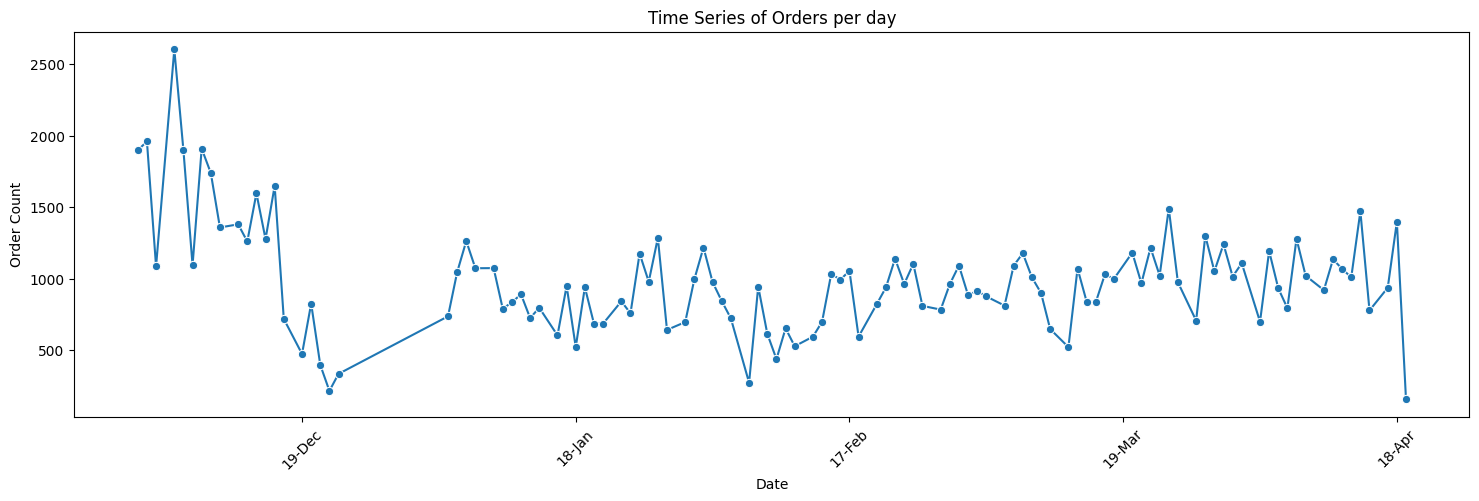

In [39]:
plt.figure(figsize=(18, 5))
sns.lineplot(data = PurchaseDate_data , x='InvoiceDate_d', y='InvoiceNo' , marker = 'o')

plt.title('Time Series of Orders per day')
plt.xlabel('Date')
plt.ylabel('Order Count')

import matplotlib.dates as mdates
date_format = mdates.DateFormatter("%d-%b")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.xticks(rotation=45)

plt.show()


## Month VS total purchase


In [40]:
data['month'] = pd.to_datetime(data['InvoiceDate']).dt.month
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
data['month'] = data['month'].map(month_dict)
data['month'] = pd.Categorical(data['month'], categories=month_dict.values())


In [41]:
month_data = data.groupby('month' , as_index = False)['total purchase'].sum()
month_data

,month,total purchase
0,January,568101.310
1,February,446084.920
2,March,594081.760
3,April,332280.871
4,May,0.000
5,June,0.000
6,July,0.000
7,August,0.000
8,September,0.000
9,October,0.000


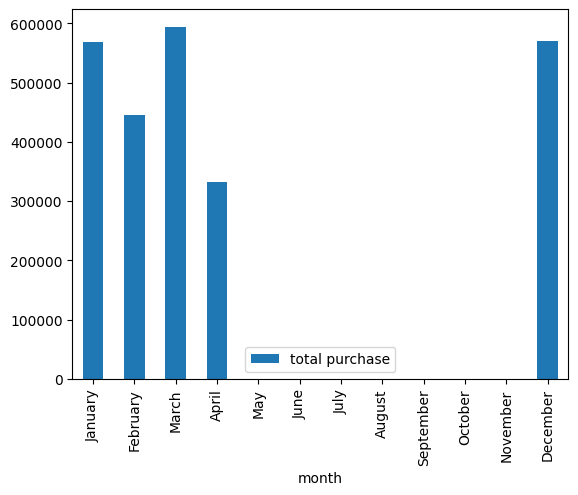

In [42]:
month_data.plot(kind = 'bar' , x = 'month')
from matplotlib.ticker import FuncFormatter

def format_y_ticks(value, _):
    if value >= 1e6:
        return f'{int(value/1e6)}M'
    else:
        return int(value)

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_ticks))
plt.show()


## Month with High cancellation of orders

In [53]:
data_Cancel['month'] = data_Cancel['InvoiceDate'].dt.month_name()

In [57]:
data_month_cancel = data_Cancel.groupby('month' , as_index= False)['InvoiceNo'].count()

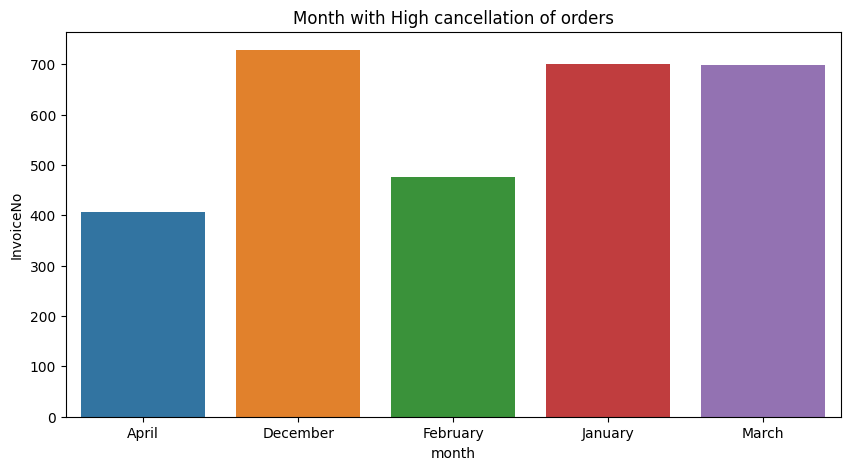

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(data = data_month_cancel , x = 'month' , y ='InvoiceNo' )
plt.title("Month with High cancellation of orders")
plt.show()

# Stock Analysis

## Top 10 Stocks With High Orders

<Axes: >

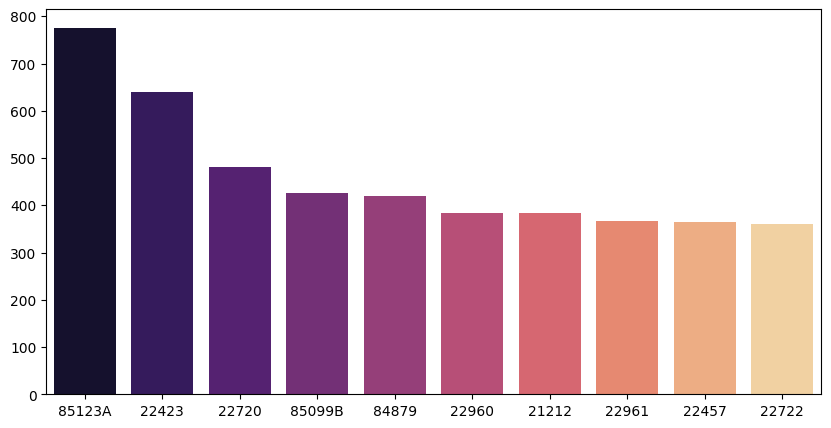

In [79]:
stockcode_counts = data.StockCode.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = stockcode_counts.index,y = stockcode_counts.values , palette='magma')


# Descriptions Analysis

In [111]:
# How many unique descriptions do we have?
data['Description'].nunique()

2968

## which are most common descriptions?

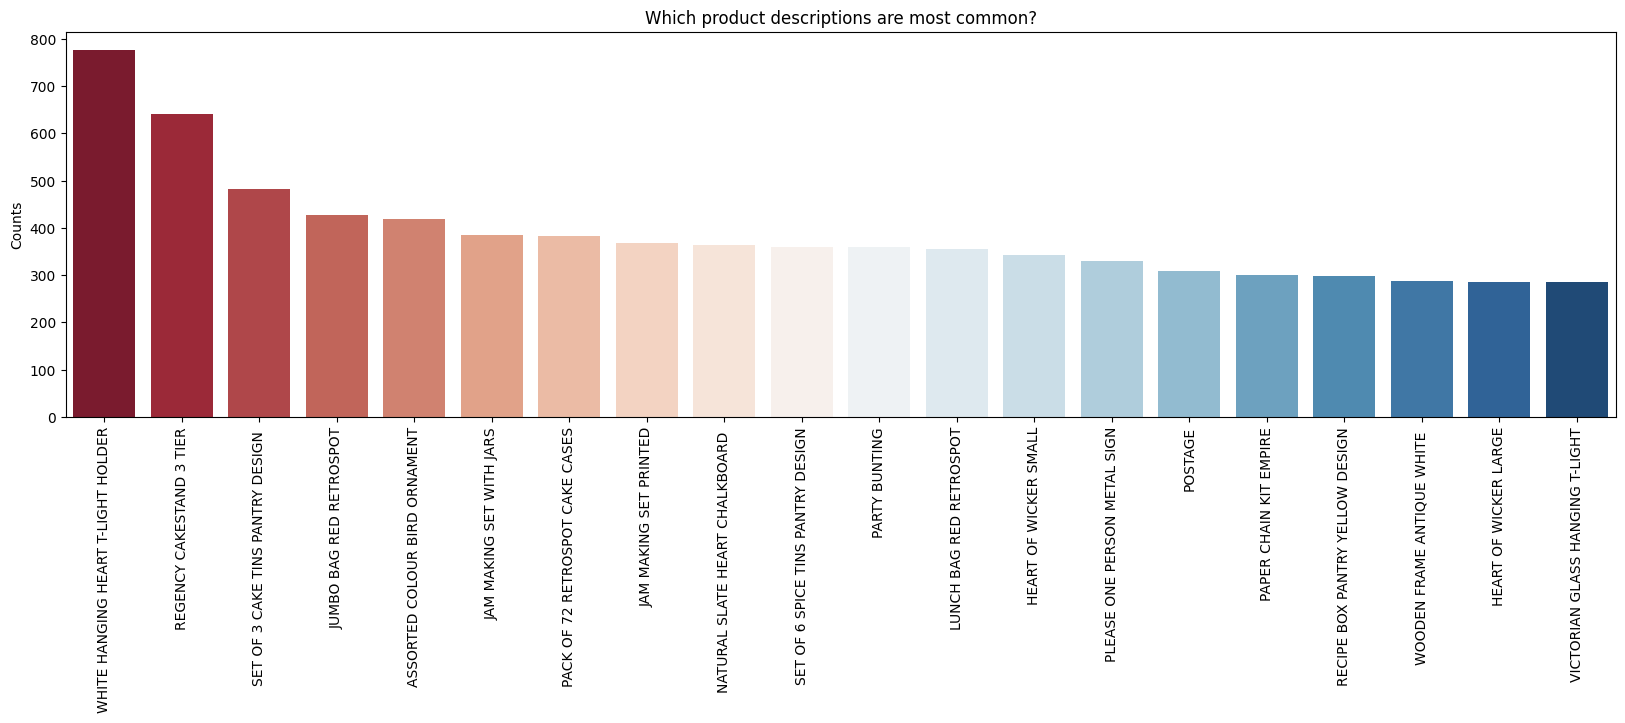

In [91]:
description_counts = data.Description.value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(20,5))
sns.barplot(x = description_counts.index, y = description_counts.values, palette="RdBu")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);

## Which product has achieved the highest sales?

In [94]:
data['total'] = data['UnitPrice']*data['Quantity']

Text(0, 0.5, 'Product Description')

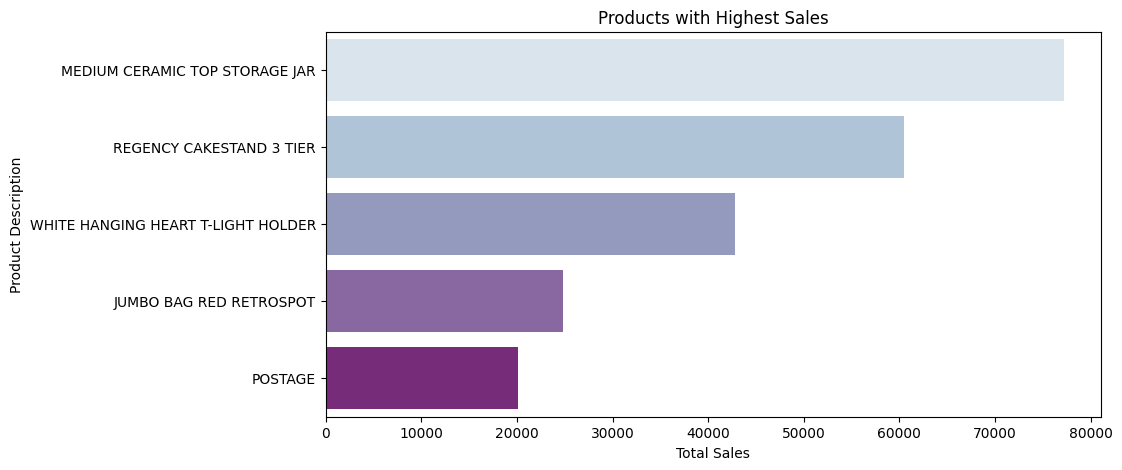

In [98]:
product_sales= data.groupby('Description').agg({'total' : 'sum'}).sort_values(by = 'total' , ascending = False).reset_index(drop= False).head(5)
plt.figure(figsize = (10,5))
ad =sns.barplot(y = 'Description' , x= 'total' , data = product_sales , palette = 'BuPu')

plt.title('Products with Highest Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')